In [1]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier   

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [2]:
# Load dataset as dataframe
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Dropping null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
# Input column for prediction
features = df.drop(columns=['fetal_health'])

# Output features
output = df['fetal_health']

# One hot encoding for categorical variables
X_encoded = pd.get_dummies(features)
X_encoded.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [5]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_dt = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [6]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_rf = RandomForestClassifier(random_state = 0)

# Fitting model on training data
clf_rf.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

In [7]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_ab = AdaBoostClassifier(algorithm = 'SAMME', random_state = 0)

# Fitting model on training data
clf_ab.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME', random_state=0)

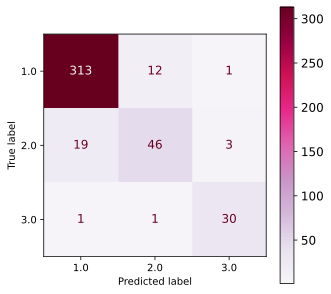

In [8]:
# Predictions on test set
y_pred_dt = clf_dt.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_dt, labels = clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_dt.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("fetal_health_dt_confusion_mat.svg");

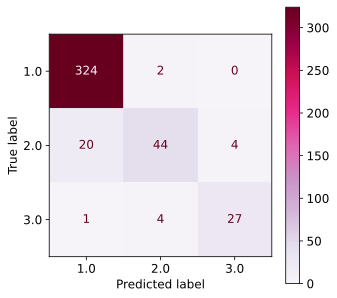

In [9]:
# Predictions on test set
y_pred_rf = clf_rf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_rf, labels = clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_rf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("fetal_health_rf_confusion_mat.svg");

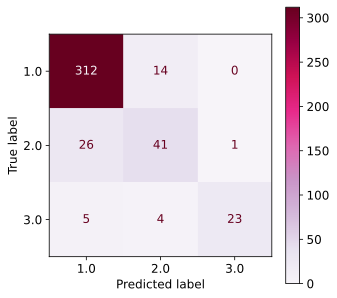

In [10]:
# Predictions on test set
y_pred_ab = clf_ab.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_ab, labels = clf_ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_ab.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("fetal_health_ab_confusion_mat.svg");

In [11]:
# Generating Classification Report
report = classification_report(test_y, y_pred_dt, output_dict = True)
report_df_dt = pd.DataFrame(report)
report_df_dt

# Save the report as a CSV File
report_df_dt.to_csv('fetal_health_dt_class_report.csv') 


In [12]:
# Generating Classification Report
report = classification_report(test_y, y_pred_rf, output_dict = True)
report_df_rf = pd.DataFrame(report)
report_df_rf

# Save the report as a CSV File
report_df_rf.to_csv('fetal_health_rf_class_report.csv') 

In [13]:
# Generating Classification Report
report = classification_report(test_y, y_pred_ab, output_dict = True)
report_df_ab = pd.DataFrame(report)
report_df_ab

# Save the report as a CSV File
report_df_ab.to_csv('fetal_health_ab_class_report.csv') 

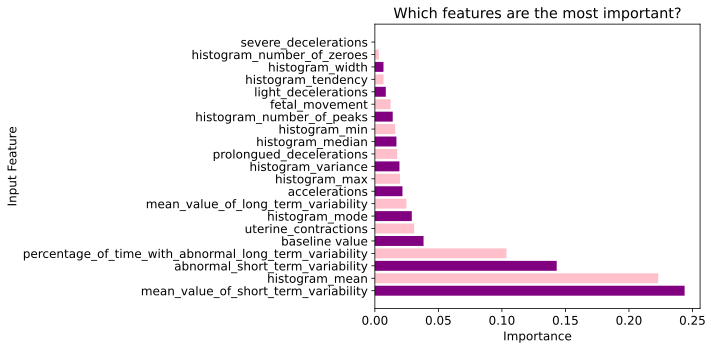

In [14]:
# Storing importance values from the trained model
importance = clf_dt.feature_importances_

# Storing feature importance as a dataframe
feature_imp_dt = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_dt = feature_imp_dt.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_dt.svg");

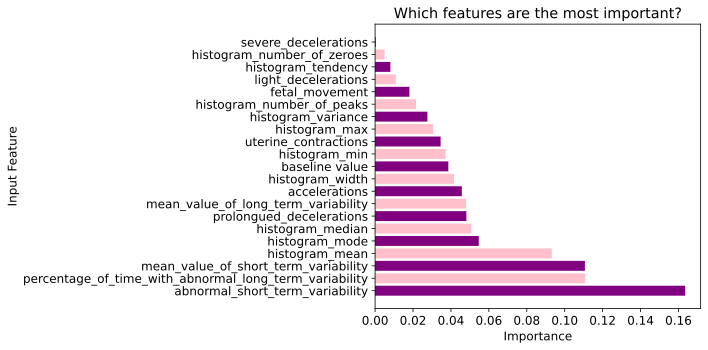

In [15]:
# Storing importance values from the trained model
importance = clf_rf.feature_importances_

# Storing feature importance as a dataframe
feature_imp_rf = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_rf = feature_imp_rf.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_rf['Feature'], feature_imp_rf['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_rf.svg");

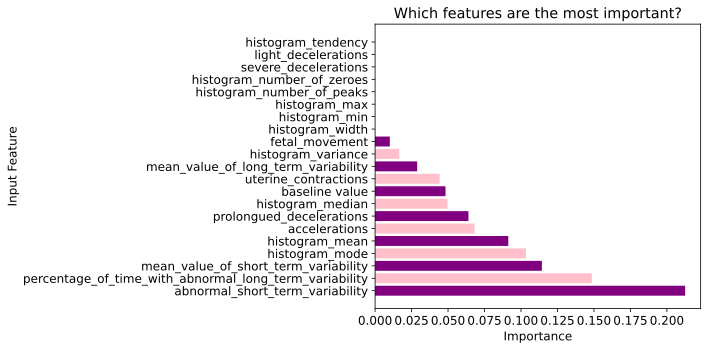

In [16]:
# Storing importance values from the trained model
importance = clf_ab.feature_importances_

# Storing feature importance as a dataframe
feature_imp_ab = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_ab = feature_imp_ab.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_ab['Feature'], feature_imp_ab['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_ab.svg");

In [17]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_fetal_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf_dt, dt_pickle) 

# Close the file
dt_pickle.close() 

# Use this pickle file in the Streamlit app

In [18]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_fetal_health.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_rf, rf_pickle) 

# Close the file
rf_pickle.close() 

# Use this pickle file in the Streamlit app

In [19]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
ab_pickle = open('adaboost_fetal_health.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_ab, ab_pickle) 

# Close the file
ab_pickle.close() 

# Use this pickle file in the Streamlit app

#SOFT VOTING CLASSIFIER BELOW

In [20]:
f1_dt = f1_score(test_y, y_pred_dt, average='macro')
f1_rf = f1_score(test_y, y_pred_rf, average='macro')
f1_ab = f1_score(test_y, y_pred_ab, average='macro')

# Normalize F1 Scores
total_f1 = f1_ab + f1_dt + f1_rf
norm_dt = f1_dt / total_f1
norm_rf = f1_rf / total_f1
norm_ab = f1_ab / total_f1

# Print Weights
print(norm_dt, norm_rf, norm_ab)


0.34208996743205655 0.340130706620117 0.3177793259478265


In [21]:
# Implement soft voting classifier on train data
clf_svm = VotingClassifier(estimators = [('dt', clf_dt), ('rf', clf_rf), ('ab', clf_ab)],
                                   voting = 'soft', 
                                   n_jobs = -1)

clf_svm.fit(train_X, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('ab',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 random_state=0))],
                 n_jobs=-1, voting='soft')

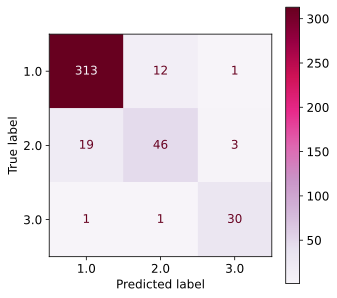

In [22]:
# Predictions on test set
y_pred_svm = clf_svm.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_svm, labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_svm.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("fetal_health_svm_confusion_mat.svg");

In [23]:
# Generating Classification Report
report = classification_report(test_y, y_pred_svm, output_dict = True)
report_df_svm = pd.DataFrame(report)
report_df_svm

# Save the report as a CSV File
report_df_svm.to_csv('fetal_health_svm_class_report.csv') 

In [24]:
# Calculate weighted importance

weights = {
    'inputs': train_X.columns,
    'dt': clf_dt.feature_importances_ * norm_dt,
    'rf': clf_rf.feature_importances_ * norm_rf,
    'ab': clf_ab.feature_importances_ * norm_ab,
}

weights

{'inputs': Index(['baseline value', 'accelerations', 'fetal_movement',
        'uterine_contractions', 'light_decelerations', 'severe_decelerations',
        'prolongued_decelerations', 'abnormal_short_term_variability',
        'mean_value_of_short_term_variability',
        'percentage_of_time_with_abnormal_long_term_variability',
        'mean_value_of_long_term_variability', 'histogram_width',
        'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
        'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
        'histogram_median', 'histogram_variance', 'histogram_tendency'],
       dtype='object'),
 'dt': array([0.01310835, 0.00743126, 0.00423687, 0.01058044, 0.00294401,
        0.        , 0.00601375, 0.04896509, 0.08340429, 0.03543328,
        0.00849593, 0.0023198 , 0.00548069, 0.00679452, 0.00481035,
        0.00106696, 0.00994079, 0.07630796, 0.005807  , 0.00662196,
        0.00232667]),
 'rf': array([0.01314088, 0.01556359, 0.00615282, 0.01175

In [25]:
# Feature Importance
svm_feat = weights['dt'] + weights['rf'] + weights['ab']
print(svm_feat)

[4.15901054e-02 4.46792972e-02 1.35987601e-02 3.64060615e-02
 6.65916091e-03 1.28720035e-04 4.27216700e-02 1.72108795e-01
 1.57372498e-01 1.20333028e-01 3.39882543e-02 1.64927155e-02
 1.81452462e-02 1.72186456e-02 1.21486606e-02 2.76652431e-03
 6.14067343e-02 1.37017438e-01 3.88749195e-02 2.12745760e-02
 5.06818997e-03]


In [26]:
feature_list = train_X.columns.tolist()

feature_df = pd.DataFrame({
    'Feature': feature_list,
    'Importance': svm_feat
})

display(feature_df)

,Feature,Importance
0,baseline value,0.041590
1,accelerations,0.044679
2,fetal_movement,0.013599
3,uterine_contractions,0.036406
4,light_decelerations,0.006659
5,severe_decelerations,0.000129
6,prolongued_decelerations,0.042722
7,abnormal_short_term_variability,0.172109
8,mean_value_of_short_term_variability,0.157372
9,percentage_of_time_with_abnormal_long_term_var...,0.120333


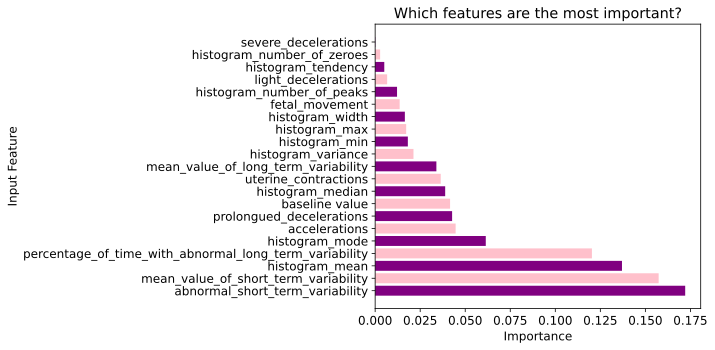

In [27]:
feature_df = feature_df.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_svm.svg");

In [28]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
svm_pickle = open('svm_fetal_health.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_svm, svm_pickle) 

# Close the file
svm_pickle.close() 

# Use this pickle file in the Streamlit app